In [1]:
#Mean Reversion Algorithm
#Takes the underlying mean stock price of the security 
#If price rises above that mean, sell; if below, buy
#Basically, we always expect the price to return to the underlying mean

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#!{sys.executable} -m pip install yfinance
import yfinance as yf


/Users/namratar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
msft_data = yf.download('GOOG', period='1y')

[*********************100%***********************]  1 of 1 completed


In [3]:
#calculate moving average of the stock over windows
#try: 50-day sma, 100 sma, 150 sma, 200 sma, cumulative moving average
#20
msft_data['20'] = msft_data['Close'].rolling(20).mean()
msft_data['20'].dropna(inplace=True)

#50
msft_data['50'] = msft_data['Close'].rolling(50).mean()
msft_data['50'].dropna(inplace=True)

#100
msft_data['100'] = msft_data['Close'].rolling(100).mean()
msft_data['100'].dropna(inplace=True)

#150
msft_data['150'] = msft_data['Close'].rolling(150).mean()
msft_data['150'].dropna(inplace=True)

#200
msft_data['200'] = msft_data['Close'].rolling(200).mean()
msft_data['200'].dropna(inplace=True)

#cumulative
msft_data['CMA'] = msft_data['Close'].expanding().mean()

msft_data

,Open,High,Low,Close,Adj Close,Volume,20,50,100,150,200,CMA
Date,,,,,,,,,,,,
2022-08-02,114.430000,117.080002,114.260002,115.900002,115.900002,17911000,NaN,NaN,NaN,NaN,NaN,115.900002
2022-08-03,116.339996,119.419998,116.150002,118.779999,118.779999,25302800,NaN,NaN,NaN,NaN,NaN,117.340000
2022-08-04,118.300003,119.500000,117.709999,118.870003,118.870003,15757700,NaN,NaN,NaN,NaN,NaN,117.850001
2022-08-05,116.930000,118.860001,116.709999,118.220001,118.220001,15615700,NaN,NaN,NaN,NaN,NaN,117.942501
2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100,NaN,NaN,NaN,NaN,NaN,117.982001
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,130.360001,131.369995,128.710007,129.660004,129.660004,46216900,121.857000,122.7352,113.35925,106.917367,104.223875,105.325446
2023-07-27,131.800003,133.600006,129.179993,129.869995,129.869995,35931600,122.296500,122.9934,113.71775,107.188834,104.375375,105.424415
2023-07-28,130.970001,134.070007,130.919998,133.009995,133.009995,26971000,122.946499,123.2518,114.09205,107.478033,104.546875,105.535201


In [4]:
#if 50day avg moves above 200 day-- buy. If below- sell
def avg_test(avg1, avg2, data):
    buy = []
    sell = []
    buy_sell = []
    #print(data)
    print(str(avg1))
    for i in range(len(data)):
        if(data[str(avg1)][i] > data[str(avg2)][i] and data[str(avg1)][i-1] < data[str(avg2)][i-1]):
            buy.append(data['Close'][i])
            sell.append(np.nan)
            buy_sell.append('B')
            print("buy")

        elif (data[str(avg1)][i] < data[str(avg2)][i] and data[str(avg1)][i-1] > data[str(avg2)][i-1]):
            sell.append(data['Close'][i])
            buy.append(np.nan)
            buy_sell.append('S')
            print("sell")
    
        else:
            sell.append(np.nan)
            buy.append(np.nan)
            buy_sell.append('S')

    data['Buy/Sell'] = buy_sell  
    return buy, sell

buy, sell = avg_test(20, 50, msft_data)

20
buy
sell
buy
sell
buy
sell
buy


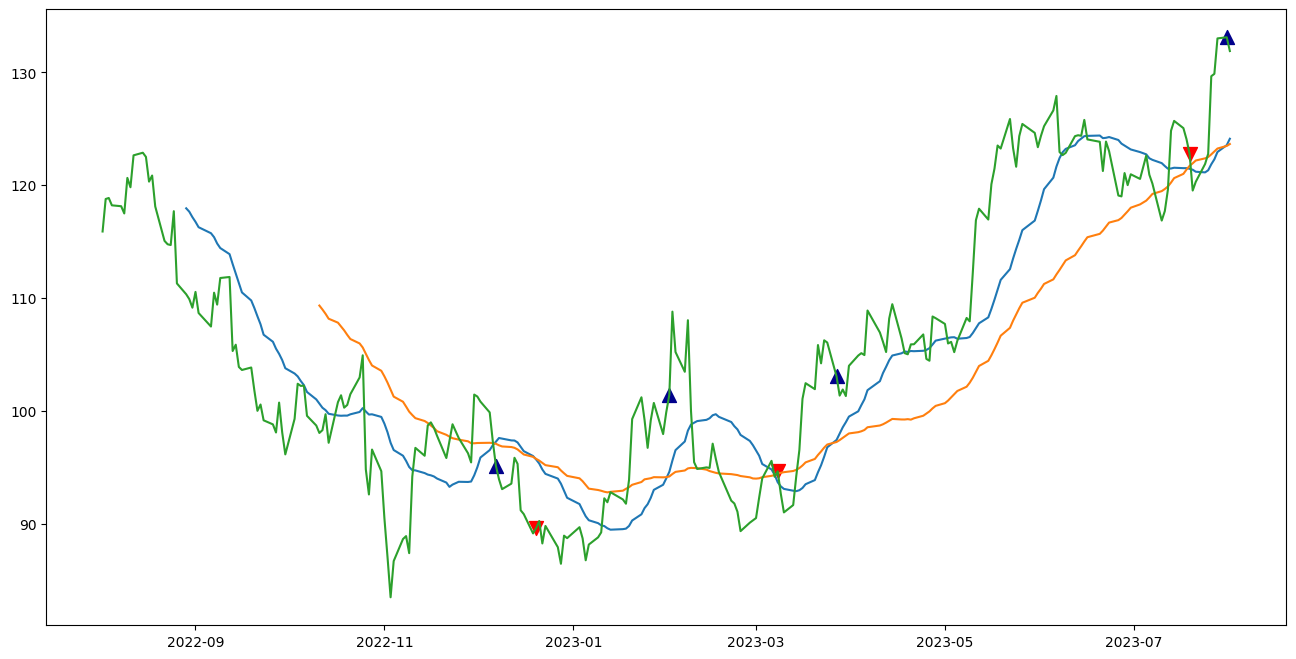

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8))
plt.plot(msft_data['20'])
plt.plot(msft_data['50'])
plt.plot(msft_data['Close'])
plt.scatter(msft_data.index, buy, marker = '^', s = 100, color = 'darkblue', label = 'BUY SIGNAL')
plt.scatter(msft_data.index, sell, marker = 'v', s = 100, color = 'red', label = 'Sell SIGNAL')


In [2]:
import numpy as np

# Define the matrices A and B
A = np.array([
    [0.4210165361201039, 0.41693912285418766, 0.39540333730096866, 0.3022099631520829, 0.11319831120538015, 0.03812161892472421, 0.1312338632552157, 0.8846668661247086],
    [0.9217573024540291, 0.2071351337195393, 0.8268308944090512, 0.45676298806143123, 0.5088904938003597, 0.9834250233418215, 0.8918800670066983, 0.1417062044082097],
    [0.5964981870296301, 0.22886824992534982, 0.7705312097831227, 0.6524782781145271, 0.7654132398379427, 0.8762450052870804, 0.9267770654508166, 0.3921070642300226],
    [0.8484641133798108, 0.030729317162626835, 0.6016256297412361, 0.07333723330678554, 0.583556992742285, 0.8326954249815445, 0.0872902127704197, 0.7927708063892871],
    [0.8468766937862419, 0.4489203543984225, 0.1116215376234373, 0.7004279018086325, 0.014976259903899947, 0.6917568544354267, 0.46883657634343145, 0.9501271833438601],
    [0.034570768469984525, 0.23671337808973114, 0.3173098037678177, 0.5500247284284572, 0.7060776324253573, 0.7094298028635726, 0.9780466933395343, 0.1738350230922251],
    [0.8011954079571219, 0.7943828910222985, 0.7794201912333875, 0.8294938835777705, 0.9020537200091702, 0.9593997235106783, 0.018400942574743784, 0.38901573317901983],
    [0.7141969048747995, 0.3319987108527568, 0.3023626736396363, 0.5655379313382672, 0.111405986227187, 0.7309336000247192, 0.17120882202140264, 0.9005923302058568]
])

B = np.array([
    [0.7573887317158519, 0.49037774107081755, 0.38340419957952, 0.41462350550847116, 0.26990988690709017, 0.23597883267243336, 0.5249323464182857, 0.7014152718567408],
    [0.7947428872134936, 0.42628439772654425, 0.957450468029698, 0.14206197937579368, 0.9956657590357966, 0.7968902860137693, 0.8567990763432916, 0.1274193975369251],
    [0.6220318760326751, 0.7201492950436473, 0.8556091237723463, 0.7530785662405494, 0.03006260259375848, 0.5857274534085997, 0.11170264130171914, 0.8877308185889589],
    [0.8104931244556066, 0.4615168471066239, 0.9118345972506012, 0.09631792154277408, 0.4964953314642897, 0.11860601554715045, 0.7676142957943737, 0.8666540102030026],
    [0.5214699790241177, 0.7515196047088905, 0.0369604799400417, 0.17616012295729255, 0.09107385337022311, 0.4350826379727163, 0.6376141667749201, 0.8972268420721387],
    [0.3557829907421638, 0.512060474639612, 0.7123239650567722, 0.2602182807162965, 0.49715815939065144, 0.2896268141125995, 0.3775613444730346, 0.5938827323276329],
    [0.46783278694290575, 0.5857667019271939, 0.5305162870063463, 0.8526398042727948, 0.6629350322321547, 0.6397467152332401, 0.4313232772673, 0.669442234858938],
    [0.7116219350396179, 0.11935771736416523, 0.017527692586707055, 0.024737396504608267, 0.5514153111193952, 0.33875980638070313, 0.030228945312952282, 0.9196395527683551],
    [0.14671583345537265, 0.630392288131345, 0.8765433825700417, 0.36259457285821894, 0.6119932375193093, 0.17086082245368084, 0.7050685044560042, 0.596834697300863],
    [0.5650049321573363, 0.5493467996919851, 0.24171486544974197, 0.9336164406457561, 0.40324272135211103, 0.532182657527123, 0.7461449218888979, 0.7148884609526053],
    [0.2765418029437543, 0.6880866860740082, 0.4696589099885903, 0.04718089560101635, 0.8765162403689603, 0.6205862167235145, 0.5179860724697347, 0.9250861600044296],
    [0.519842026114758, 0.10740216359423849, 0.9863544841533065, 0.6259968893359272, 0.2970733940533643, 0.9331911322454841, 0.20166326039880222, 0.4407644704860648],
    [0.2891173637223461, 0.26960152808267956, 0.982574439561906, 0.717830132779189, 0.32658581607031634, 0.4076261619104449, 0.8367077580678751, 0.2437345738419212],
    [0.9356908768026145, 0.23690832905134518, 0.20479779928500763, 0.9431299461939251, 0.36897863135229947, 0.16308992904277186, 0.12271933148629888, 0.37281931289040127],
    [0.3480001876229126, 0.15314752171563195, 0.9678464341292639, 0.7096028335245932, 0.07861756235027717, 0.35885105024404984, 0.9824356847804019, 0.23353501234735485],
    [0.8381703535179876, 0.6384714166920592, 0.6717370349730408, 0.37141353169595714, 0.9998052958113025, 0.5594838459416689, 0.7247921347461429, 0.8851652297781858]
])

# Perform matrix multiplication
result = np.matmul(A, B)

# Print the result
print(result)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 8)